In [1]:
import pandas as pd
import numpy as np
import tensorflow 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

from keras import backend
from keras.optimizers import Adam
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_decision_regions


## __1 - Business Problem__  
___Build a Neural Network model for 50_startups data to predict profit___  

## __2 - Data collection and description__ 

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


### Outlier Check

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


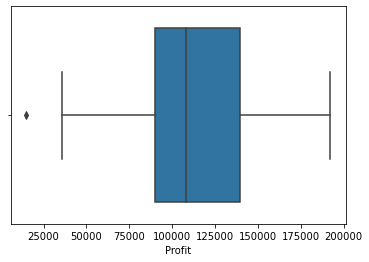

In [7]:
ax = sns.boxplot(df1['Profit'])

### There are 1 Outlier instances in our data

In [8]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.023291019769116614
Kurtosis: -0.06385888546853113


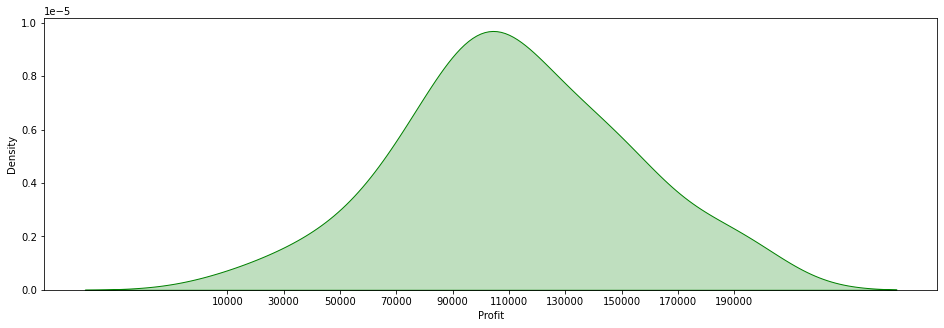

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Profit'].skew()))
print("Kurtosis: {}".format(df1['Profit'].kurtosis()))
ax = sns.kdeplot(df1['Profit'],shade=True,color='g')
plt.xticks([i for i in range(10000,200000,20000)])
plt.show()

### The Data is positively skewed and has a negative kurtosis value  
### Majority of the profit is in the range 70000 to 150000

In [10]:
dfa = df1[df1.columns]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

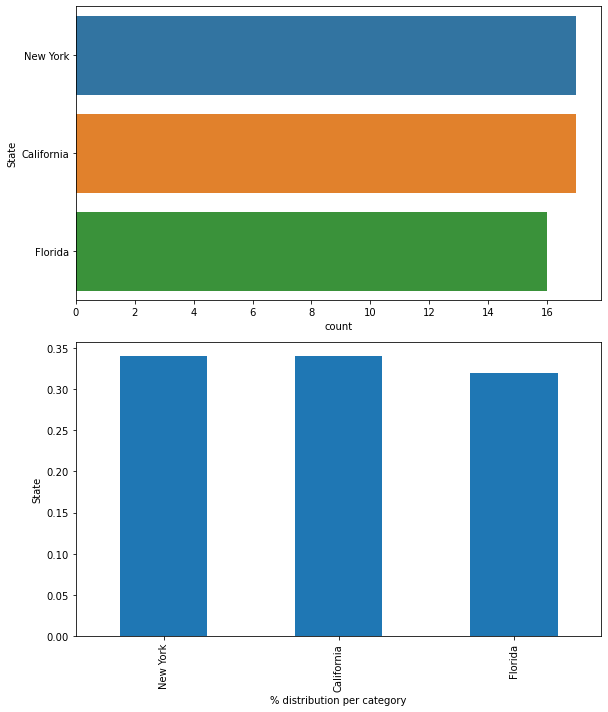

In [11]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [12]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

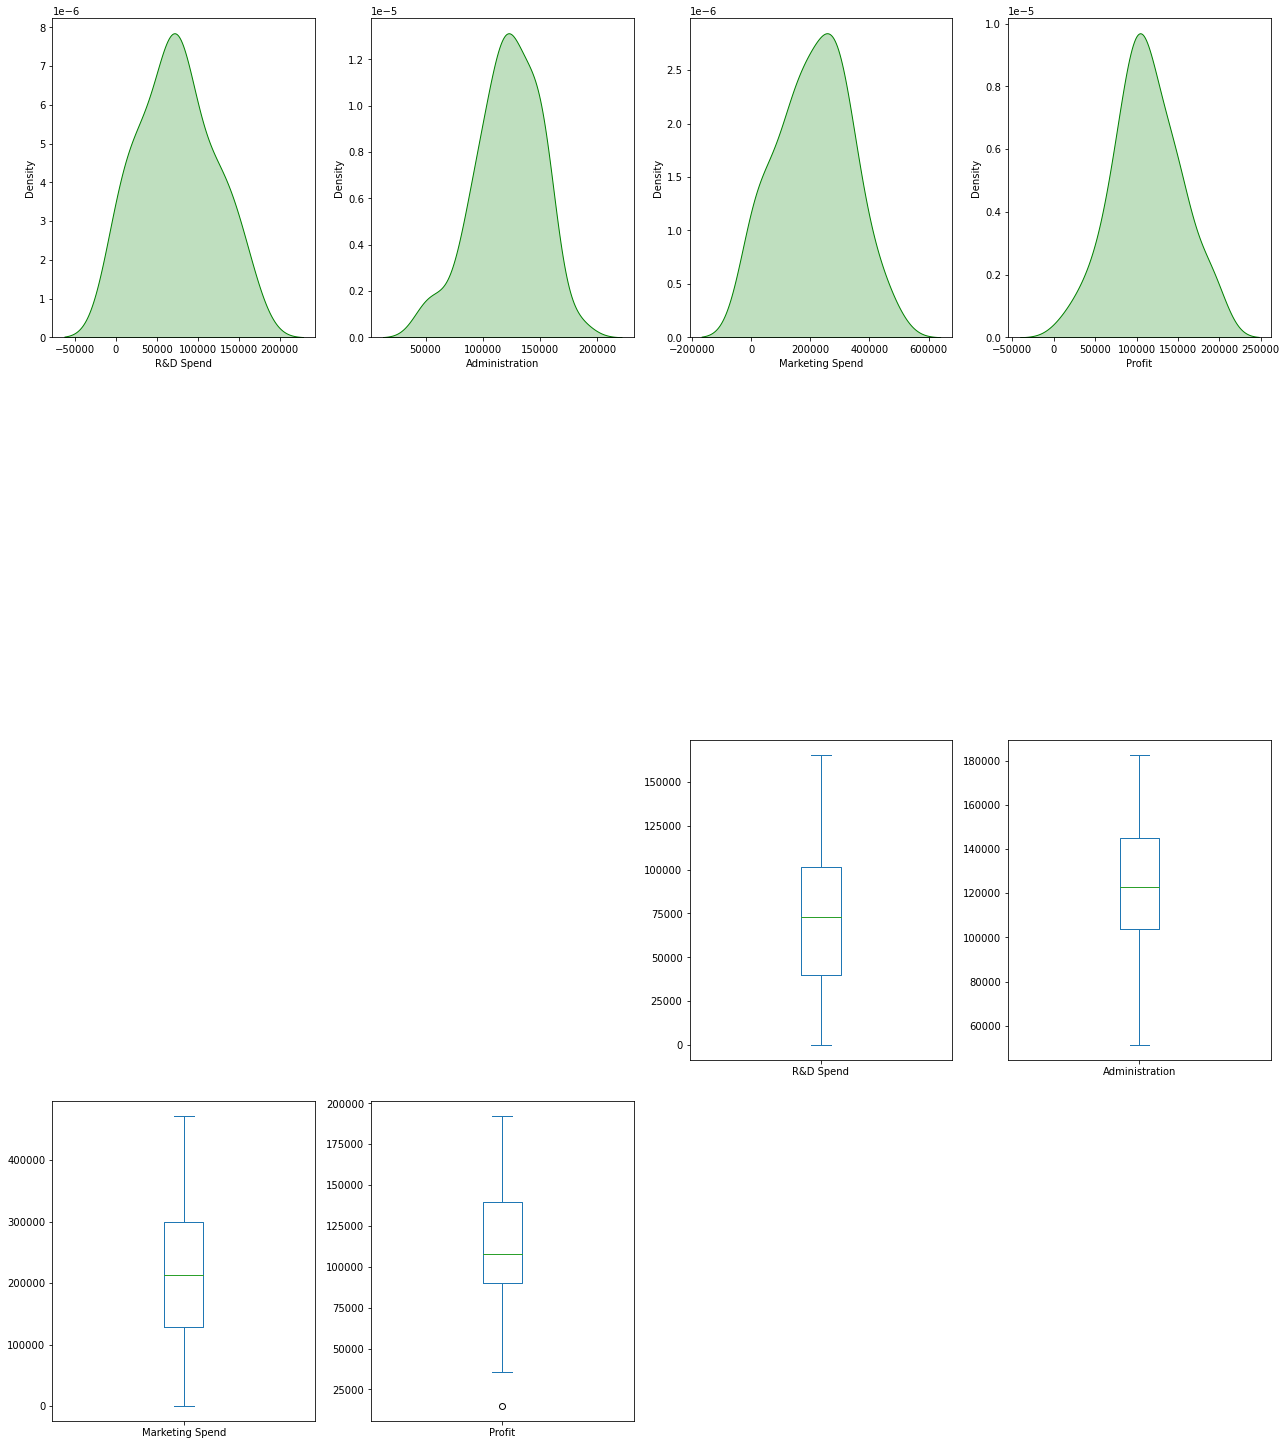

,R&D Spend,Administration,Marketing Spend,Profit
skewness,0.164002,-0.489025,-0.046472,0.023291
kurtosis,-0.761465,0.225071,-0.671701,-0.063859


In [13]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### Finding Correlation

In [14]:
df1 = pd.get_dummies(df1, columns = ['State'])

In [15]:
corr = df1.corr()

<AxesSubplot:>

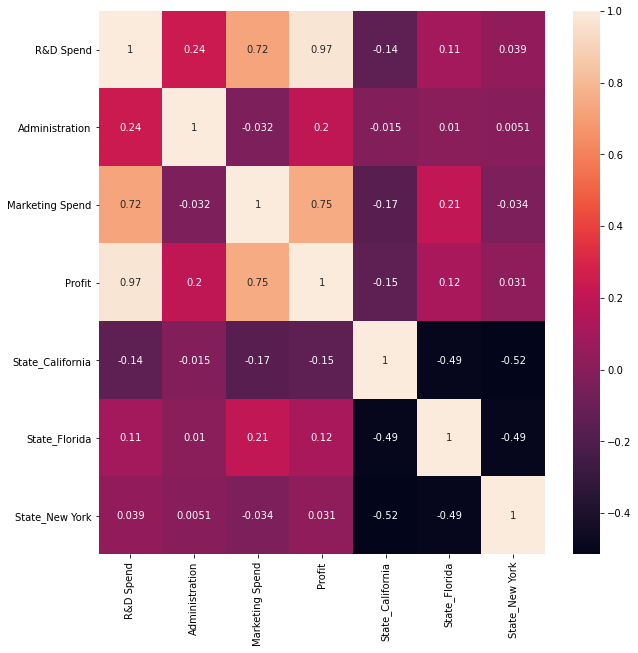

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Neural Network Model__ 

In [17]:
df1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [18]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return (x)

In [19]:
df1 = norm_func(df1)

In [20]:
X = df1.drop(columns=['Profit'])
y = df1['Profit']

In [36]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [40]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [41]:
model = prep_model([6,50,1])

In [42]:
model.fit(np.array(x_train),np.array(y_train),epochs=900)

Epoch 1/900
2/2 [==============================] - 0s 8ms/step - loss: 0.1430 - accuracy: 0.0286
Epoch 2/900
2/2 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.0286
Epoch 3/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0891 - accuracy: 0.0286
Epoch 4/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0679 - accuracy: 0.0571
Epoch 5/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.0571
Epoch 6/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.0571
Epoch 7/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0270 - accuracy: 0.0571
Epoch 8/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.0571
Epoch 9/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.0571
Epoch 10/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.0571
Epoch 11/900
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.0571
Epoch 168/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.0571
Epoch 169/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.0571
Epoch 170/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.0571
Epoch 171/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 172/900
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 173/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 174/900
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 175/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 176/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 0.0571
Epoch 177/900
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 0.0571
Epoch 332/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.0571
Epoch 333/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.0571
Epoch 334/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 0.0571
Epoch 335/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0571
Epoch 336/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.0571
Epoch 337/900
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.0571
Epoch 338/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.0571
Epoch 339/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.0571
Epoch 340/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0571
Epoch 341/900
2/2 [====

2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0571
Epoch 496/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0571
Epoch 497/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0571
Epoch 498/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.0571
Epoch 499/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.0571
Epoch 500/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 0.0571
Epoch 501/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0571
Epoch 502/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 0.0571
Epoch 503/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.0571
Epoch 504/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0571
Epoch 505/900
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 660/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 661/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 662/900
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 663/900
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 664/900
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 665/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 666/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 667/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 668/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0571
Epoch 669/900
2/2 [====

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 824/900
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 0.0571
Epoch 825/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0571
Epoch 826/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0571
Epoch 827/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 828/900
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 829/900
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 830/900
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0571
Epoch 831/900
2/2 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 832/900
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0571
Epoch 833/900
2/2 [===

In [25]:
train = model.predict(np.array(x_train))

2/2 [==============================] - 0s 9ms/step


In [26]:
train = pd.Series([i[0] for i in train])

In [27]:
np.sqrt(np.mean((train-y_train)**2))

0.2897285751839241

In [28]:
np.corrcoef(train,y_train)

array([[1.        , 0.98444878],
       [0.98444878, 1.        ]])

## __4 - Conclusion__ 

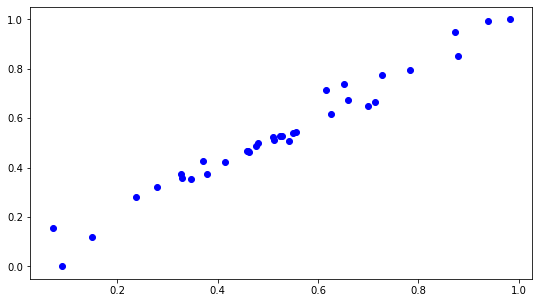

In [29]:
plt.plot(train,y_train,"bo")